In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
from sklearn.metrics import r2_score

In [4]:
from sklearn.linear_model import LinearRegression

In [3]:
x = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/0_x.csv",
                header=None)
y = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/0_y.csv",
                header=None)

HTTPError: ignored

Так как ссылки не работаю возьму датасет из 1.3, понимаю его возможную необъективность для данной модели обучения, но почему бы и нет)

In [6]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [147]:
x = pd.DataFrame(california.data)
y = pd.DataFrame(california.target)

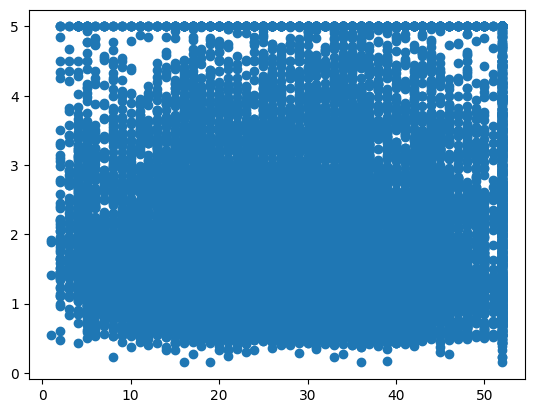

In [ ]:
binary = LinearRegression()
binary.fit(x[[1]], y)
binary.coef_
binary.predict(x[[1]])
plt.scatter(x[1], y)

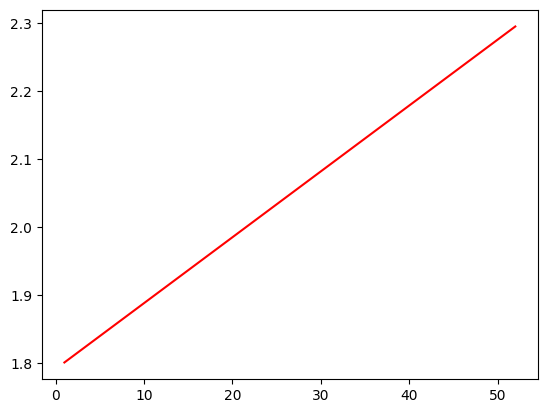

In [ ]:
xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c = 'r')

In [ ]:
multiple = LinearRegression()
multiple.fit(x, y)
multiple.score(x, y)

0.606232685199805

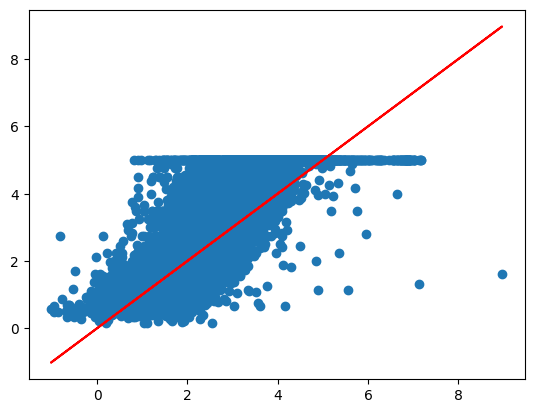

In [ ]:
yy = multiple.predict(x)
plt.scatter(yy, y)
plt.plot(yy, yy, c='r')

In [ ]:
x.shape

(20640, 8)

1. Самостоятельно постройте парные регрессии от каждого атрибута с целевой переменной.

Ввиду нерабочей ссылки на koroteev.site взятый датасет имеет множество

In [ ]:
binar = LinearRegression()
for i in x:
  binar.fit(x[[i]], y)
  print(binar.coef_[0][0])

0.41793849201896277
0.009684496397427559
0.07086879328040553
-0.11371409577330753
-2.5117527746150702e-05
-0.0026373775427609232
-0.07788312115186699
-0.026474978154716625


2. (*) Модифицируйте код из предыдущей работы так, чтобы модель регрессии умела работать с входными данными, состоящими из произвольного количества столбцов

In [ ]:
class MultipleRegression:
    def __init__(self):
        self.b = None
    def predict(self, x):
        return x @ self.b
    def MSE(self, x, y):
        return (((y - self.predict(x)).T@(y - self.predict(x))) / (2 * x.shape[0])).values
    def MAE(self, x, y):
        return (abs(y - self.predict(x)).mean()).values
    def MAPE(self, x, y):
        return (abs((y - self.predict(x))/y).mean()).values
    def coefs(self):
        return self.b
    def fit(self, x, y, alpha = 0.1, epsylon = 0.1, max_steps = 10000, intercept = True):
        if intercept and "intercept" not in x.columns:
            x.insert(0, "intercept", np.ones((x.shape[0],1)))
        self.b = np.zeros((x.shape[1], 1))
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ_b = -1*(x.T@(y -self.predict(x)))/x.shape[0]
            self.b -= alpha*dJ_b
            new_error = self.MSE(x, y)
            step += 1
            steps.append(step)
            errors.append(new_error)
            if new_error < epsylon:
                break

        return steps, errors

In [ ]:
Y = y.values.reshape(-1, 1)

scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)
x_normalized = pd.DataFrame(data=x_normalized, columns=x.columns)

regr = MultipleRegression()
steps, errors = regr.fit(x_normalized, Y, alpha = 0.01, epsylon = 0.01, max_steps = 1000, intercept = True)

In [ ]:
y_pred_custom = regr.predict(x_normalized)
r2 = r2_score(Y, y_pred_custom)
mse = mean_squared_error(Y, y_pred_custom)

print("Метрики для модели, написанной своими руками:")
print(f"R^2: {r2}")
print(f"MSE: {mse}")

Метрики для модели, написанной своими руками:
R^2: 0.584660836664833
MSE: 0.5530449875746685


3. Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.

In [18]:
len(list(y[0]))

20640

Так как датасет огромный будем брать не все данные из него а только например 30 точек, для лучшей визуализации.
И сократим колличество его признаков, скажем до 5
ПОТОМУ ЧТО ДАТАСЕТ НА КОРОТЕЕВ САЙТ БОЛЬШЕ НЕ АКТИВЕН!!!

Красивая визуализация Полиминально регресии

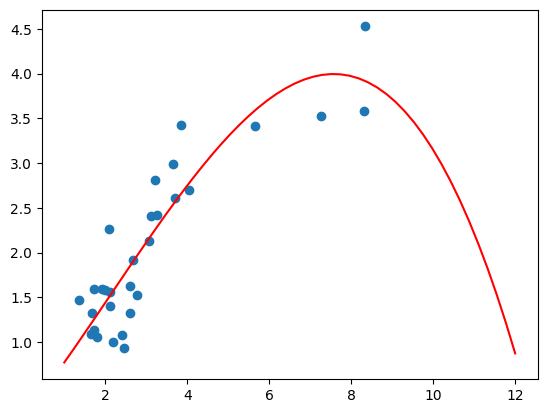

In [37]:
#polynomial fit with degree = 3
model = np.poly1d(np.polyfit(x[0][:30], y[0][:30], 3))

#add fitted polynomial line to scatterplot
polyline = np.linspace(1, 12, 50)
plt.scatter(x[0][:30], y[0][:30])
plt.plot(polyline, model(polyline), color = 'red')
plt.show()

Само обучение:

В самом обучении достаточно менять просто данные, на которых и которые необходимо обучить, демонстрация изменений самих данных в задании 4!!!

In [38]:
from sklearn.linear_model import LinearRegression

In [44]:
from sklearn.preprocessing import PolynomialFeatures

In [86]:
poly = PolynomialFeatures(degree=3, include_bias=False)

In [87]:
poly_features = poly.fit_transform(x[0][:30].to_numpy().reshape(-1, 1))

In [83]:
pred =  list(y[0][:30].to_numpy())

In [ ]:
def poly_mod(x, y, degree = 3):
  poly = PolynomialFeatures(degree=3, include_bias=False)
  poly_features = poly.fit_transform(x[0][:30].to_numpy().reshape(-1, 1))
  pred =  list(y[0][:30].to_numpy())

  poly_reg = LinearRegression()
  poly_reg.fit(poly_features, pred)
  y_pred = poly_reg.predict(poly_features)

In [88]:
poly_reg = LinearRegression()
poly_reg.fit(poly_features, pred)
y_pred = poly_reg.predict(poly_features)

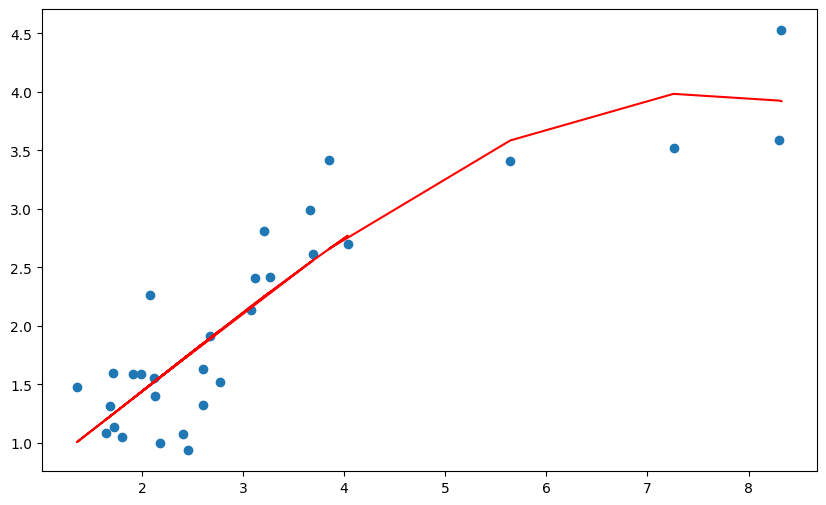

In [89]:
plt.figure(figsize=(10,6))
plt.scatter(x[0][:30], y[0][:30])
plt.plot(x[0][:30], y_pred, c = 'red')
plt.show()

А Вот картинки полиминальной регресси для всех условий из задания 3:

<Figure size 3000x300 with 0 Axes>

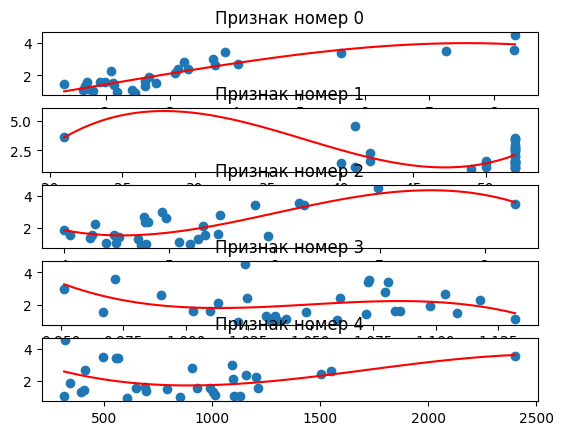

In [125]:
#Для 3 степни
fig = plt.figure(figsize=(30, 3))
fig, axis = plt.subplots(5)
polyline = np.linspace(1, 100, 50)
for j in range(5):
    polyline = np.linspace(min(list(x[j][:30])), max(list(x[j][:30])), 50)
    model = np.poly1d(np.polyfit(x[j][:30], y[0][:30], 3))
    axis[j].scatter(x[j][:30], y[0][:30])
    axis[j].plot(polyline, model(polyline), color = 'red')
    axis[j].set_title(f'Признак номер {j + 1}')
plt.show()

<Figure size 3000x300 with 0 Axes>

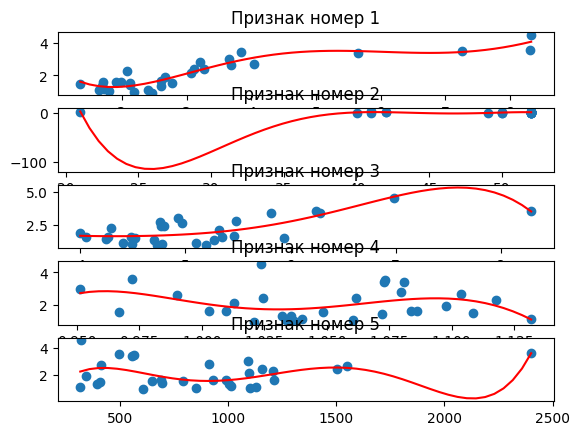

In [126]:
#Для 5 степни
fig = plt.figure(figsize=(30, 3))
fig, axis = plt.subplots(5)
polyline = np.linspace(1, 100, 50)
for j in range(5):
    polyline = np.linspace(min(list(x[j][:30])), max(list(x[j][:30])), 50)
    model = np.poly1d(np.polyfit(x[j][:30], y[0][:30], 5))
    axis[j].scatter(x[j][:30], y[0][:30])
    axis[j].plot(polyline, model(polyline), color = 'red')
    axis[j].set_title(f'Признак номер {j + 1}')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


<Figure size 3000x300 with 0 Axes>

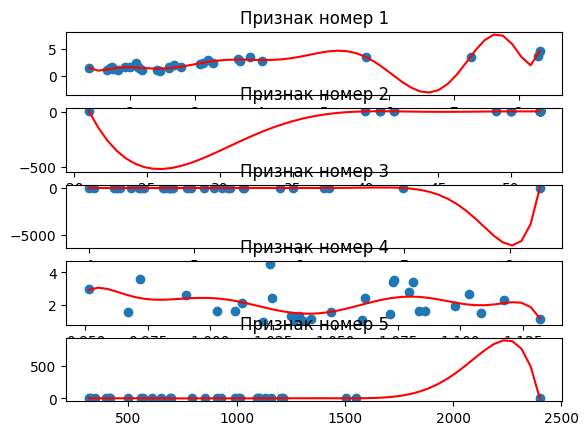

In [127]:
#Для 10 степни
fig = plt.figure(figsize=(30, 3))
fig, axis = plt.subplots(5)
polyline = np.linspace(1, 100, 50)
for j in range(5):
    polyline = np.linspace(min(list(x[j][:30])), max(list(x[j][:30])), 50)
    model = np.poly1d(np.polyfit(x[j][:30], y[0][:30], 10))
    axis[j].scatter(x[j][:30], y[0][:30])
    axis[j].plot(polyline, model(polyline), color = 'red')
    axis[j].set_title(f'Признак номер {j + 1}')
plt.show()

4. Постройте сводную таблицу показателей точности всех построенных моделей. Сделайте вывод, какие модели переобученнные, какие - недообученные.

In [142]:
def poly_mod(x, y, degree = 3):
  poly = PolynomialFeatures(degree=degree, include_bias=False)
  poly_features = poly.fit_transform(x.reshape(-1, 1))
  pred = list(y)

  poly_reg = LinearRegression()
  poly_reg.fit(poly_features, pred)
  y_pred = poly_reg.predict(poly_features)

  return [r2_score(pred, y_pred), mean_squared_error(pred, y_pred)]

In [237]:
metrics = []
for j in [3, 5, 10]:
  for i in range(5):
    x1 = x[i][:30].to_numpy()
    y1 = y[0][:30].to_numpy()
    metrics.append(poly_mod(x1, y1, j))

In [239]:
metrics1 = np.split(np.array(metrics).transpose().reshape(-1), 2)[0].reshape(3, 5)
metrics2 = np.split(np.array(metrics).transpose().reshape(-1), 2)[1].reshape(3, 5)
metrics = np.concatenate((metrics1, metrics2), axis = 0)
columns = ['Данные №1', 'Данные №2', 'Данные №3', 'Данные №4', 'Данные №5']
metrics

array([[0.81090253, 0.17974137, 0.53925255, 0.1095302 , 0.18303509],
       [0.86354924, 0.22398566, 0.5600075 , 0.15654574, 0.19605357],
       [0.92044231, 0.25332395, 0.62586336, 0.28344555, 0.17861055],
       [0.1645423 , 0.7137443 , 0.40091729, 0.77483823, 0.71087829],
       [0.11873201, 0.67524534, 0.38285747, 0.73392787, 0.69955031],
       [0.06922676, 0.64971675, 0.32555329, 0.62350658, 0.71472828]])

In [244]:
data = pd.DataFrame(metrics, columns = ['Данные №1', 'Данные №2', 'Данные №3', 'Данные №4', 'Данные №5'])
data['Среднеe'] = data.mean(axis = 1)
data['Метрики'] = ['r2_score, степень 3', 'r2_score, степень 5', 'r2_score, степень 10', 'mean_squared_error, степень 3', 'mean_squared_error, степень 5', 'mean_squared_error, степенб 10']
data.set_index('Метрики', inplace = True)
data

,Данные №1,Данные №2,Данные №3,Данные №4,Данные №5,Среднеe
Метрики,,,,,,
"r2_score, степень 3",0.810903,0.179741,0.539253,0.109530,0.183035,0.364492
"r2_score, степень 5",0.863549,0.223986,0.560007,0.156546,0.196054,0.400028
"r2_score, степень 10",0.920442,0.253324,0.625863,0.283446,0.178611,0.452337
"mean_squared_error, степень 3",0.164542,0.713744,0.400917,0.774838,0.710878,0.552984
"mean_squared_error, степень 5",0.118732,0.675245,0.382857,0.733928,0.699550,0.522063
"mean_squared_error, степенб 10",0.069227,0.649717,0.325553,0.623507,0.714728,0.476546


Вывод: Все метрики идут на улучшение -> Переобучение не происходит в рамках этих данных (Датасет другой, возможны не состыковки)!!!

5. Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.

В задании 4 добавил еще метрику mean_squared_error (она в твбличке)

6. (*) Замерьте время обучения полиномиальных моделей с разной степенью полинома. Сделайте вывод.

In [245]:
import datetime

In [265]:
# код, время работы которого измеряем
def poly_mod(x, y, degree = 3):
  poly = PolynomialFeatures(degree=degree, include_bias=False)
  poly_features = poly.fit_transform(x.reshape(-1, 1))
  pred = list(y)
  poly_reg = LinearRegression()

  start = datetime.datetime.now()

  poly_reg.fit(poly_features, pred)

  finish = datetime.datetime.now()

  y_pred = poly_reg.predict(poly_features)

  return str(finish - start)


listik = []
for j in [3, 5, 10]:
  x1 = x[0][:30].to_numpy()
  y1 = y[0][:30].to_numpy()
  listik.append(poly_mod(x1, y1, j))

In [266]:
listik

['0:00:00.001856', '0:00:00.001452', '0:00:00.001058']

По полученным данным не получается сделать однозначный вывод так как постоянно разное значение скорости (у меня), но если судить по этим данным, то со степенью 3 обучается медленее остальных